# Imports

In [1]:
from pyts.datasets import load_gunpoint
from pyts.image import RecurrencePlot

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
X_train, X_test, y_train, y_test = load_gunpoint(return_X_y=True)

In [3]:
X_train.shape

(50, 150)

In [4]:
y_train.shape

(50,)

In [5]:
X_test.shape

(150, 150)

In [6]:
y_test.shape

(150,)

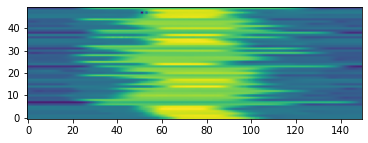

In [7]:
plt.imshow(X_train, origin='lower');

In [8]:
df = pd.DataFrame(X_train)

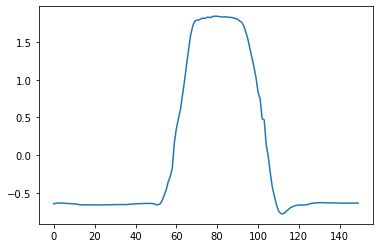

In [9]:
df.iloc[0, :].plot.line();

In [10]:
transformer = RecurrencePlot()
X_train_new = transformer.transform(X_train)

In [11]:
X_train_new.shape

(50, 150, 150)

In [12]:
y_train

array([2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1,
       1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 1, 2, 1, 2], dtype=int64)

In [13]:
y_train_1 = np.where(y_train == y_train.min())[0]
y_train_1

array([ 2,  3,  9, 10, 11, 12, 13, 15, 18, 20, 21, 22, 24, 26, 27, 29, 30,
       33, 35, 41, 42, 43, 46, 48], dtype=int64)

In [14]:
y_train_2 = np.where(y_train == y_train.max())[0]
y_train_2

array([ 0,  1,  4,  5,  6,  7,  8, 14, 16, 17, 19, 23, 25, 28, 31, 32, 34,
       36, 37, 38, 39, 40, 44, 45, 47, 49], dtype=int64)

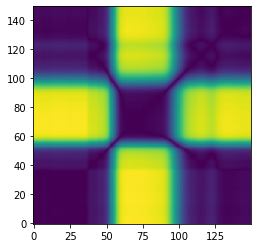

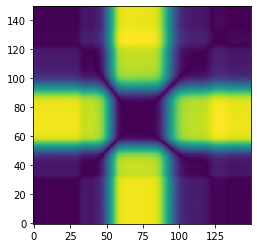

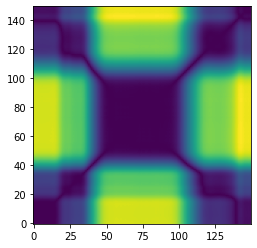

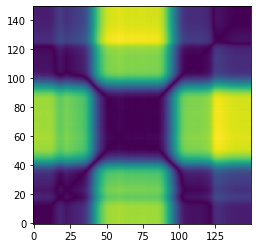

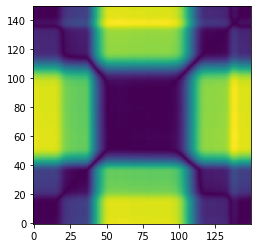

In [15]:
for idx_1 in y_train_1.tolist()[:5]:
    plt.imshow(X_train_new[idx_1], origin='lower')
    plt.show();

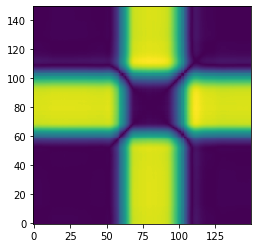

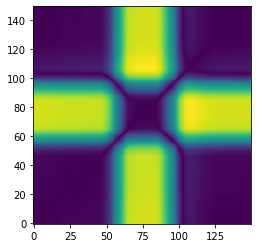

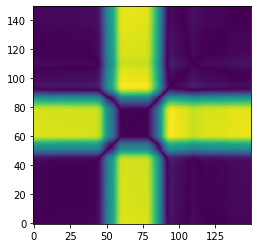

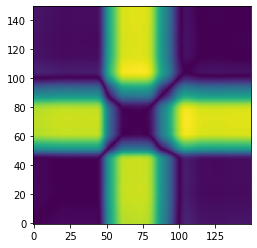

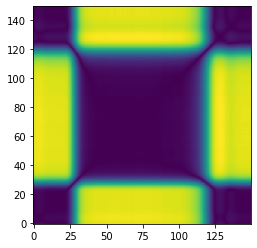

In [16]:
for idx_2 in y_train_2.tolist()[:5]:
    plt.imshow(X_train_new[idx_2], origin='lower')
    plt.show();